In [67]:
import pandas as pd
from matplotlib import pyplot as plt

# Data preparation
Extracting and Cleaning Data

In [70]:
df = pd.read_csv("../real_estate.csv") # extract data from csv file and writing to DataFrame object
df.dropna(inplace=True) # delete rows with NaN values
df.head()

,address,type,area,price,number_of_rooms,renovation
0,ЖК Millennium Eco Apartments,Квартира,57.0,51700.0,2.0,без ремонту
1,вул. Незалежності,Квартира,69.2,83000.0,2.0,з ремонтом
3,вул. Княгинин,Квартира,42.0,36000.0,1.0,без ремонту
4,"вул. Мазепи, 175а",Квартира,42.0,31100.0,1.0,без ремонту
5,вул. Мельничука,Квартира,98.0,112600.0,3.0,з ремонтом


# Get average TotalPrice & Price for m^2 

In [65]:
df["price_for_m^2"] = df["price"] / df["area"] # creating new column "price_for_m^2"
print(f"Average TotalPrice: {round(df['price'].mean(), 2)}$\n"
      f"Average Price per m^2: {round(df['price_for_m^2'].mean(), 2)}$")

Average TotalPrice: 59746.64$
Average Price per m^2: 976.21$


# Get average prices that depend on renovation

In [64]:
with_renovation = df[df["renovation"] == "з ремонтом"]
without_renovation = df[df["renovation"] == "без ремонту"]

price_with_renovation = round(with_renovation["price"].mean(), 2)
price_per_m2_with_renovation = round(with_renovation["price_for_m^2"].mean(), 2)

price_without_renovation = round(without_renovation["price"].mean(), 2)
price_per_m2_without_renovation = round(without_renovation["price_for_m^2"].mean(), 2)

percentage_of_difference = round((
        (price_with_renovation - price_without_renovation) / price_without_renovation * 100
), 1)

print("Average prices for apartment with renovation:\n"
      f"    TotalPrice: {price_with_renovation}$\n"
      f"    Price per m^2: {price_per_m2_with_renovation}$\n\n"
      "Average prices for apartment without renovation:\n"
      f"    TotalPrice: {price_without_renovation}$\n"
      f"    Price per m^2: {price_per_m2_without_renovation}$\n\n"
      "Conclusion: Therefore, on average, price for apartments with renovation is \n"
      f"approximately {percentage_of_difference}% higher than apartments without renovation")

Average prices for apartment with renovation:
    TotalPrice: 71276.1$
    Price per m^2: 1158.74$

Average prices for apartment without renovation:
    TotalPrice: 49222.97$
    Price per m^2: 809.61$

Conclusion: Therefore, on average, price for apartments with renovation is 
approximately 44.8% higher than apartments without renovation


# Get average prices that depend on number of rooms

In [63]:
price = df.groupby("number_of_rooms")["price"].mean()
print("Average price by number of rooms:")
for num_rooms, avg_price in price.items():
    print(f"    Number of rooms: {int(num_rooms)}, Average price: {int(avg_price)}$")


Average price by number of rooms:
    Number of rooms: 1, Average price: 43946$
    Number of rooms: 2, Average price: 61050$
    Number of rooms: 3, Average price: 79393$
    Number of rooms: 4, Average price: 112327$
    Number of rooms: 5, Average price: 115700$
    Number of rooms: 6, Average price: 128400$


# The median price of apartments

In [66]:
general_median_price = df["price"].median()

median_price_with_renovation = with_renovation["price"].median()
median_price_without_renovation = without_renovation["price"].median()

print("Median price of apartments:\n"
      f"    in general: {general_median_price}$\n"
      f"    with renovation: {median_price_with_renovation}$\n"
      f"    without renovation: {median_price_without_renovation}$\n")

Median price of apartments:
    in general: 53500.0$
    with renovation: 65000.0$
    without renovation: 43500.0$


# Distribution of prices by number of rooms

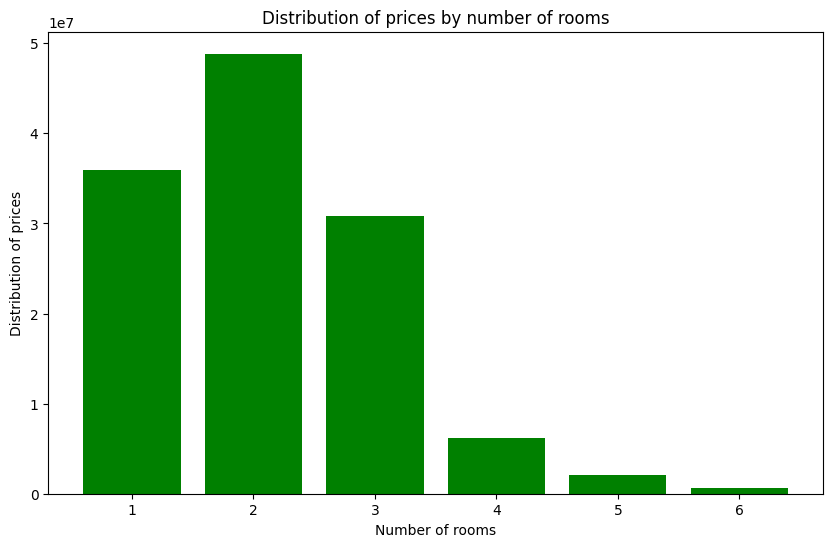

In [50]:
number_of_rooms = df.groupby("number_of_rooms")["price"].sum()

plt.figure(figsize=(10, 6))
plt.bar(number_of_rooms.index, number_of_rooms.values, color="green")
plt.xlabel("Number of rooms")
plt.ylabel("Distribution of prices")
plt.title("Distribution of prices by number of rooms")
plt.show()


In conclusion, based on the bar plot, we can infer that the most preferred option for both ceiling and purchase is apartments with two rooms.